## Imports

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

## Split

In [89]:
import os
import random

In [95]:
%run ../jsrt.py
%run ../../utils/__init__.py

In [82]:
images_dir = os.path.join(DATASET_DIR, 'images')

metadata_fpath = os.path.join(DATASET_DIR, 'jsrt_metadata.csv')
metadata = pd.read_csv(metadata_fpath)
images = list(metadata['study_id'])
len(images), len(set(images))

(247, 247)

In [88]:
fold1 = [
    name
    for name in images
    if int(name[-5]) % 2 != 0
]
fold2 = [
    name for name in images
    if name not in train
]
len(fold1), len(fold2)

(124, 123)

In [91]:
random.shuffle(fold2)

In [94]:
n_val = len(fold2) // 2

train = fold1
val = fold2[:n_val]
test = fold2[n_val:]
len(train), len(val), len(test)

(124, 61, 62)

In [97]:
for split, images in zip(['train', 'val', 'test'], [train, val, test]):
    filepath = os.path.join(DATASET_DIR, 'splits', split)
    filepath = f'{filepath}.txt'
    write_list_to_txt(images, filepath)

## Test Dataset class

In [19]:
%run ../jsrt.py
%run ../../utils/__init__.py

In [21]:
dataset = JSRTDataset('test', image_size=(512, 512))
len(dataset)

62

In [22]:
item = dataset[0]

In [23]:
item.image.size()

torch.Size([3, 512, 512])

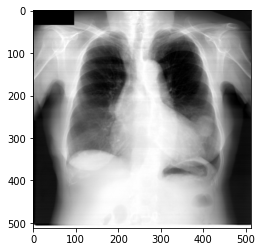

In [24]:
plt.imshow(tensor_to_range01(item.image.permute(1, 2, 0)))

## Compute mean and std

In [ ]:
import os
import pandas as pd

In [51]:
%run ../jsrt.py
%run ../../utils/images.py

In [47]:
images_dir = os.path.join(DATASET_DIR, 'images')

metadata_fpath = os.path.join(DATASET_DIR, 'jsrt_metadata.csv')
metadata = pd.read_csv(metadata_fpath)

image_names = metadata['study_id']

In [54]:
mean, std = compute_mean_std(ImageFolderIterator(images_dir, image_names), show=True)
mean, std

(tensor([0.5937, 0.5937, 0.5937]), tensor([0.2729, 0.2729, 0.2729]))

## Check image sizes

In [ ]:
import matplotlib.pyplot as plt

In [24]:
# idx = 2
# image_name = dataset.images_names[idx]

sizes = set()

for image_name in dataset.images_names:
    image_fpath = os.path.join(dataset.images_dir, image_name)

    image = Image.open(image_fpath).convert('RGB')
    sizes.add(image.size)
    
sizes

{(2048, 2048)}

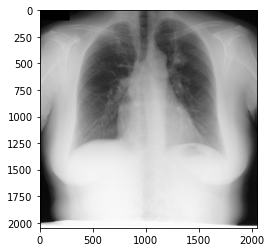

In [23]:
plt.imshow(image)

All images are 2048 x 2048